# Importing packages 

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

#import metrics
from sklearn.metrics import r2_score

# Loading the dataset

In [2]:
df = pd.read_csv('movie_metadata.csv')

#### Display first 5 rows of the dataset

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### Columns of the dataset

In [4]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

#### Dropping rows with null values

In [5]:
df.dropna(inplace=True)

# Histogram of IMDB Rating

/Users/goat_10/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/goat_10/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Movie Ratings')

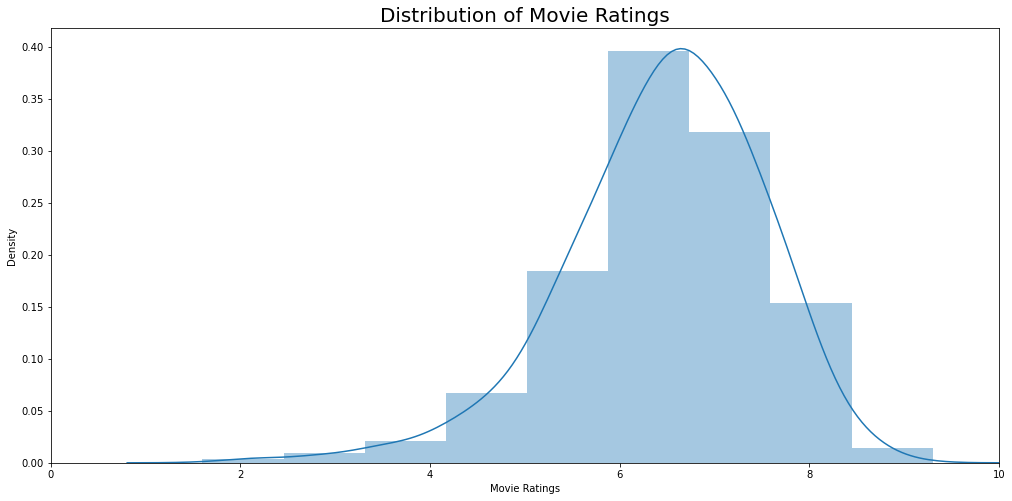

In [36]:
plt.figure(figsize=(17,8))
ax = sns.distplot(df['imdb_score'], bins=9, kde_kws={"bw": 0.25}, 
                  axlabel='Movie Ratings')
ax.set(xlim=(0, 10))
ax.set_title("Distribution of Movie Ratings",fontsize = 20)

# Dropping unnescessary columns for predicting IMDB Rating

In [7]:
#these feature has no or the least impact on the movie rating so droping these column
df=df.drop(columns=['movie_imdb_link','color','movie_title','facenumber_in_poster', 'plot_keywords',
                    'actor_3_name','movie_imdb_link','aspect_ratio','language'])

In [8]:
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

# Comparison Graph ( Number of Movies per Content Rating )

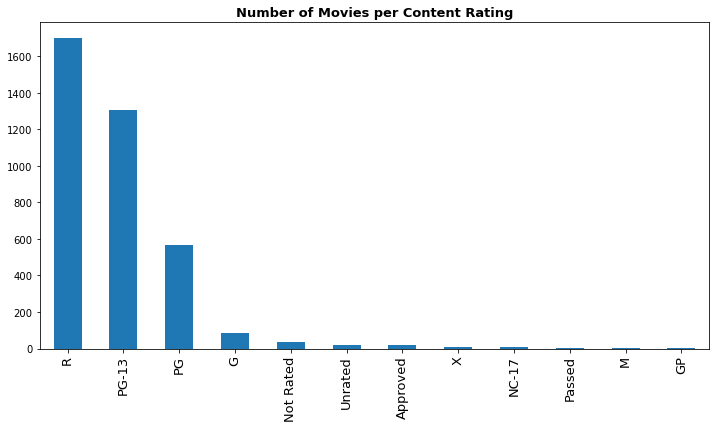

In [9]:
plt.figure(figsize=(12,6))
df['content_rating'].value_counts().plot.bar().set_title("Number of Movies per Content Rating",fontsize=13,fontweight="bold")
plt.xticks(fontsize = 13)
plt.show()

# Replacing String Value with Float Value

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['content_rating']=le.fit_transform(df['content_rating'].values)
df['director_name']=le.fit_transform(df['director_name'].values)
df['genres']=le.fit_transform(df['genres'].values)

df['actor_1_name']=le.fit_transform(df['actor_1_name'].values)
df['actor_2_name']=le.fit_transform(df['actor_2_name'].values)
df['country']=le.fit_transform(df['country'].values)

In [11]:
df.head

<bound method NDFrame.head of       director_name  num_critic_for_reviews  duration  \
0               620                   723.0     178.0   
1               538                   302.0     169.0   
2              1395                   602.0     148.0   
3               251                   813.0     164.0   
5                62                   462.0     132.0   
...             ...                     ...       ...   
5026           1167                    81.0     110.0   
5027            612                    64.0      90.0   
5033           1425                   143.0      77.0   
5035           1343                    56.0      81.0   
5042            791                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes  actor_2_name  \
0                         0.0                   855.0          1002   
1                       563.0                  1000.0          1592   
2                         0.0                   161.0          1795   
3

# Splitting Features and Value to be predicted

In [12]:
y=df['imdb_score'].values
x=df.loc[:, df.columns != 'imdb_score'].values

# Splitting into Training and Testing Set

In [13]:
X_train, X_test, Y_train, Y_test= train_test_split(x,y, test_size=0.2, random_state=0)

# Prediction Models

### Random Forest Regression -------------->

In [14]:
rf=RandomForestRegressor(n_estimators=50)
rf.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=50)

In [15]:
predictions4 = rf.predict(X_test)

In [16]:
#Calulate Error 
errors4 = abs(predictions4 - Y_test)

#Calculate Mean Absolute Error 
MAE4 = round(np.mean(errors4), 2)
print('MAE :', MAE4 , 'degrees')

#Calculate Mean Absolute Percentage Error (MAPE)
mape = 100 * (errors4 / Y_test)

#Calculate  Accuracy
accuracy4 = 100 - np.mean(mape)
print('Accuracy :', round(accuracy4, 2), '%')

#Calulate Mean Squared Error 
MSE4 = np.square(np.subtract(Y_test,predictions4)).mean()
print("MSE : {}".format(MSE4))

#Calculate Root Mean Squared Method
RMSE4 = math.sqrt(MSE4)
print("RMSE : {}".format(RMSE4))

#Calculate R2 Score
rsquared4 = r2_score(Y_test,predictions4)
print("R2 Score : ",rsquared4)

MAE : 0.52 degrees
Accuracy : 90.54 %
MSE : 0.49834743617021277
RMSE : 0.7059372749545194
R2 Score :  0.5769518681318516


### Decision Tree Regression --------------->

In [17]:
dr=DecisionTreeRegressor()
dr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [18]:
predictions2 = dr.predict(X_test)

In [19]:
#Calulate Error
errors2 = abs(predictions2 - Y_test)

#Calculate Mean Absolute Error
MAE2 = round(np.mean(errors2), 2)
print('MAE :', MAE2, 'degrees')

#Calculate Mean Absolute Percentage Error (MAPE)
mape = 100 * (errors2 / Y_test)

#Calculate Accuracy
accuracy2 = 100 - np.mean(mape)
print('Accuracy:', round(accuracy2, 2), '%')

#Calulate Mean Squared Error 
MSE2 = np.square(np.subtract(Y_test,predictions2)).mean()
print("MSE : {}".format(MSE2))

#Calculate Root Mean Squared Method
RMSE2 = math.sqrt(MSE2)
print("RMSE : {}".format(RMSE2))

#Calculate R2 Score
rsquared2 = r2_score(Y_test,predictions2)
print("R2 Score : ",rsquared2)

MAE : 0.74 degrees
Accuracy: 86.99 %
MSE : 1.0714627659574467
RMSE : 1.035114856408431
R2 Score :  0.09043312234527667


### Support Vector Machine --------------->

In [20]:
svm=SVR()
svm.fit(X_train,Y_train)

SVR()

In [21]:
predictions3 = svm.predict(X_test)

In [22]:
#Calulate Error
errors3 = abs(predictions3 - Y_test)

#Calculate Mean Absolute Error
MAE3 = round(np.mean(errors3), 2)
print('Mean Absolute Error:', MAE3 , 'degrees.')

#Calculate Mean Absolute Percentage Error (MAPE)
mape = 100 * (errors3 / Y_test)

#Calculate  Accuracy
accuracy3 = 100 - np.mean(mape)
print('Accuracy:', round(accuracy3, 2), '%.')

#Calulate Mean Squared Error 
MSE3 = np.square(np.subtract(Y_test,predictions3)).mean()
print("MSE : {}".format(MSE3))

#Calculate Root Mean Squared Method
RMSE3 = math.sqrt(MSE3)
print("RMSE : {}".format(RMSE3))   

#Calculate R2 Score
rsquared3 = r2_score(Y_test,predictions3)
print("R2 Score : ",rsquared2)

Mean Absolute Error: 0.78 degrees.
Accuracy: 85.77 %.
MSE : 1.0787437572701304
RMSE : 1.0386258986132255
R2 Score :  0.09043312234527667


### XG Boost ---------------->

In [23]:
from xgboost import XGBRegressor
xgboost=XGBRegressor(n_estimators=50)

In [24]:
xgboost.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
predictions5=xgboost.predict(X_test)

In [26]:
#Calulate Error
errors5 = abs(predictions5 - Y_test)

#Calculate Mean Absolute Error
MAE5 = round(np.mean(errors5), 2)
print('Mean Absolute Error:', MAE5 , 'degrees.')

#Calculate Mean Absolute Percentage Error (MAPE)
mape = 100 * (errors5 / Y_test)

#Calculate  Accuracy
accuracy5 = 100 - np.mean(mape)
print('Accuracy:', round(accuracy5, 2), '%.')

#Calulate Mean Squared Error 
MSE5 = np.square(np.subtract(Y_test,predictions5)).mean()
print("MSE : {}".format(MSE5))

#Calculate Root Mean Squared Method
RMSE5 = math.sqrt(MSE5)
print("RMSE : {}".format(RMSE5))

#Calculate R2 Score
rsquared5 = r2_score(Y_test,predictions5)
print("R2 Score : ",rsquared5)

Mean Absolute Error: 0.49 degrees.
Accuracy: 91.12 %.
MSE : 0.44004860484659186
RMSE : 0.6633615943409686
R2 Score :  0.6264418622433701


### Linear Regression -------------->

In [27]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [28]:
predictions1=xgboost.predict(X_test)

In [30]:
#Calulate Error
errors1 = abs(predictions1 - Y_test)

#Calculate Mean Absolute Error
MAE1 = round(np.mean(errors1), 2)
print('Mean Absolute Error:', MAE1 , 'degrees.')

#Calculate Mean Absolute Percentage Error (MAPE)
mape = 100 * (errors1 / Y_test)

#Calculate  Accuracy
accuracy1 = 100 - np.mean(mape)
print('Accuracy:', round(accuracy1, 2), '%.')

#Calulate Mean Squared Error 
MSE1 = np.square(np.subtract(Y_test,predictions1)).mean()
print("MSE : {}".format(MSE1))

#Calculate Root Mean Squared Method
RMSE1 = math.sqrt(MSE1)
print("RMSE : {}".format(RMSE1))

#Calculate R2 Score
rsquared1 = r2_score(Y_test,predictions1)
print("R2 Score : ",rsquared1)

Mean Absolute Error: 0.49 degrees.
Accuracy: 91.12 %.
MSE : 0.44004860484659186
RMSE : 0.6633615943409686
R2 Score :  0.6264418622433701


# Comparison Graph ( r2 score of Regressors )

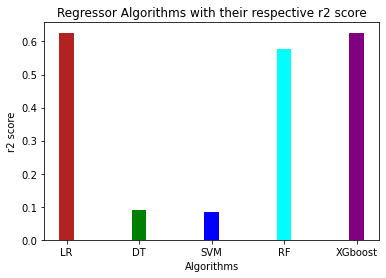

In [31]:
algos_reg = ['LR','DT','SVM','RF','XGboost']
r2 = [rsquared1,rsquared2,rsquared3,rsquared4,rsquared5]
plt.bar(algos_reg,r2, color=['firebrick','green','blue','cyan','purple'],width=0.2)
plt.xlabel("Algorithms")
plt.ylabel("r2 score")
plt.title('Regressor Algorithms with their respective r2 score')
plt.show()

# Comparison of RMSE Score of Regressors

In [32]:
results1 = pd.DataFrame({
    'Model' :[
        'XG Boost Regressor',
        'Random Forest Regressor',
        'Support Vector Machine',
        'Decision Tree Regressor',
        'Linear Regression'
    ],
    'RMSE Score':[RMSE5,RMSE4,RMSE3,RMSE2,RMSE1]})

result_df = results1.sort_values(by='RMSE Score', ascending= True)
result_df = result_df.set_index('RMSE Score')
result_df.head(9)

,Model
RMSE Score,
0.663362,XG Boost Regressor
0.663362,Linear Regression
0.705937,Random Forest Regressor
1.035115,Decision Tree Regressor
1.038626,Support Vector Machine


# Comparison of MAE Score of Regressors

In [33]:
results2 = pd.DataFrame({
    'Model' :[
        'XG Boost Regressor',
        'Random Forest Regressor',
        'Support Vector Machine',
        'Decision Tree Regressor',
        'Linear Regression'
    ],
    'MAE Score':[MAE5,MAE4,MAE3,MAE2,MAE1]})

result_df = results2.sort_values(by='MAE Score', ascending= True)
result_df = result_df.set_index('MAE Score')
result_df.head(9)

,Model
MAE Score,
0.49,XG Boost Regressor
0.49,Linear Regression
0.52,Random Forest Regressor
0.74,Decision Tree Regressor
0.78,Support Vector Machine


# Comparison of Accuracy of Regressors

In [34]:
results3 = pd.DataFrame({
    'Model' :[
        'XG Boost Regressor',
        'Random Forest Regressor',
        'Support Vector Machine',
        'Decision Tree Regressor',
        'Linear Regression'
    ],
    'Accuracy':[accuracy5,accuracy4,accuracy3,accuracy2,accuracy1]})

result_df = results3.sort_values(by='Accuracy', ascending= True)
result_df = result_df.set_index('Accuracy')
result_df.head(9)

,Model
Accuracy,
85.772064,Support Vector Machine
86.992170,Decision Tree Regressor
90.543682,Random Forest Regressor
91.122359,XG Boost Regressor
91.122359,Linear Regression


#  Comparison of R2 Score of Regressors

In [38]:
results4 = pd.DataFrame({
    'Model' :[
        'XG Boost Regressor',
        'Random Forest Regressor',
        'Support Vector Machine',
        'Decision Tree Regressor',
        'Linear Regression'
    ],
    'R2 Score':[rsquared5,rsquared4,rsquared3,rsquared2,rsquared1]})

result_df = results4.sort_values(by='R2 Score', ascending= True)
result_df = result_df.set_index('R2 Score')
result_df.head(9)

,Model
R2 Score,
0.084252,Support Vector Machine
0.090433,Decision Tree Regressor
0.576952,Random Forest Regressor
0.626442,XG Boost Regressor
0.626442,Linear Regression
